In [1]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Loading the Dataset

In [2]:
df = pd.read_csv('banking_updated.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [4]:
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [5]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,yes,no,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Visualizing the Data

In [7]:
import seaborn as sns

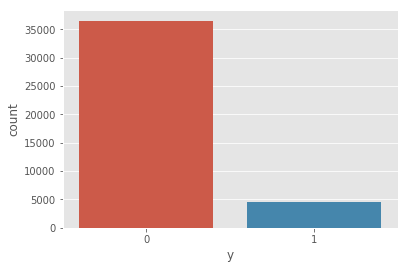

In [8]:
sns.countplot(x='y', data=df)

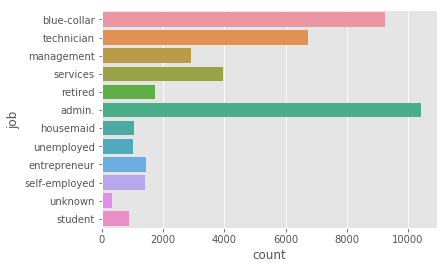

In [9]:
sns.countplot(y='job', data=df)

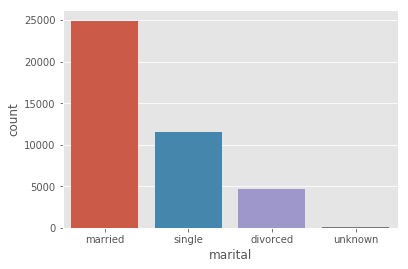

In [10]:
sns.countplot(x='marital', data=df)

In [11]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [12]:
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [13]:
df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

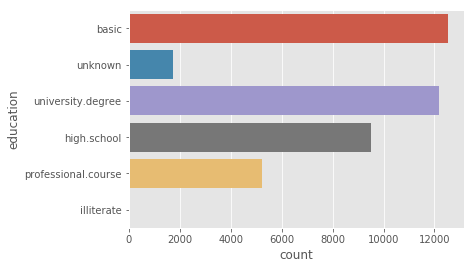

In [14]:
sns.countplot(y='education', data=df)

In [15]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,yes,no,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,yes,no,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Pre Processing

In [16]:
le = preprocessing.LabelEncoder()

In [17]:
df.job = le.fit_transform(df.job)

In [18]:
df.marital = le.fit_transform(df.marital)

In [19]:
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)

In [20]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,5,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,4,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,1,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [21]:
df.shape

(41188, 15)

In [23]:
X = df.iloc[:,0:14]
X

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,5,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,4,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,1,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2
5,30,4,0,0,2,0,8,0,1,1.4,93.918,-42.7,4.961,5228.1
6,37,1,1,0,2,0,1,0,1,-1.8,92.893,-46.2,1.327,5099.1
7,39,1,0,0,2,0,1,0,1,-1.8,92.893,-46.2,1.313,5099.1
8,36,0,1,4,0,0,1,1,2,-2.9,92.963,-40.8,1.266,5076.2
9,27,1,2,0,2,0,2,1,0,-1.8,93.075,-47.1,1.410,5099.1


In [24]:
y = df.iloc[:,14]
y

0        0
1        0
2        1
3        0
4        1
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       1
13       0
14       0
15       0
16       1
17       1
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    0
41159    0
41160    0
41161    0
41162    0
41163    0
41164    0
41165    0
41166    0
41167    0
41168    0
41169    0
41170    0
41171    0
41172    1
41173    0
41174    0
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    0
41182    0
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

### Train and Test split

In [26]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
x_train.shape, y_train.shape

((32950, 14), (32950,))

In [28]:
x_test.shape, y_test.shape

((8238, 14), (8238,))

### Training the model

In [29]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [30]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
prediction=model.predict(x_test)

### Evaluating the model

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.90228210730759895

In [33]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[7270   55]
 [ 750  163]]


In [35]:
from sklearn.svm import SVC
clf = SVC()

In [36]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
pred = clf.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.89232823500849723

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [40]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
predict = rfc.predict(x_test)

In [43]:
accuracy_score(y_test, predict)

0.89123573682932755

In [44]:
from keras.models import Sequential
from keras.layers import Dense

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [74]:
model = Sequential()
model.add(Dense(10, input_dim=14, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

In [75]:
from keras import optimizers
adam = optimizers.Adam(lr=0.1)

In [76]:
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [77]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
#print(x_train_keras.shape)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [79]:
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
32950/32950 [==============================] - 26s - loss: 0.3576 - acc: 0.8869    - ETA: 6s - loss:
Epoch 2/10
32950/32950 [==============================] - 26s - loss: 0.3560 - acc: 0.8869    
Epoch 3/10
32950/32950 [==============================] - 25s - loss: 0.3586 - acc: 0.8869    
Epoch 4/10
32950/32950 [==============================] - 25s - loss: 0.3599 - acc: 0.8869    - ETA: 0s - loss: 0.3600 - acc: 0.
Epoch 5/10
32950/32950 [==============================] - 25s - loss: 0.3576 - acc: 0.8869    
Epoch 6/10
32950/32950 [==============================] - 26s - loss: 0.3581 - acc: 0.8869    
Epoch 7/10
32950/32950 [==============================] - 28s - loss: 0.3598 - acc: 0.8869    
Epoch 8/10
32950/32950 [==============================] - 26s - loss: 0.3589 - acc: 0.8869    - ETA: 0s - loss: 0.3592 - acc: 0.
Epoch 9/10
32950/32950 [==============================] - 27s - loss: 0.3591 - acc: 0.8869    
Epoch 10/10
32950/32950 [==============================] - 2

In [80]:
scores = model.evaluate(np.array(x_test), np.array(y_test))

8192/8238 [============================>.] - ETA: 0s

In [81]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 88.92%
